# Clustering NBA Point Guards
The purpose of this notebook is identify the play style of each player inside the traditional basketball positions. We
will the KMeans clustering algorithm.

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import joblib

## Loading data
The first step is load players data. It is necessary to split the original data set into five subsets, one for each
position.
We will run the clustering algorithm with different stats, and evaluate the performance by each one:
* Per game stats.
* Advanced stats.
* Per game and advanced stats.

In [2]:
players_data = pd.read_csv('PlayersAdvStats.csv')
players_data

,player_id,first_name,last_name,position,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
0,2594,Kyle,Korver,SG,1838.732,9.537,3.463,4.537,8.000,1.878,...,0.550305,0.106707,0.234756,0.648923,12.815404,1.236092,14.662028,10.312763,1.251121,14.556519
1,200757,Thabo,Sefolosha,SF,1474.865,7.000,2.838,2.676,5.514,0.541,...,0.563725,0.230392,0.098039,3.585926,18.075794,1.707651,13.478127,8.936384,2.938303,12.977360
2,200794,Paul,Millsap,PF,1974.786,18.405,6.476,6.714,13.190,0.833,...,0.522563,0.447653,0.063177,8.931694,21.260316,3.252318,12.415469,17.860828,2.918783,24.894147
3,201143,Al,Horford,C,1891.209,15.395,6.558,6.605,13.163,0.953,...,0.534452,0.128975,0.072438,8.164184,18.443503,3.859859,8.700696,16.168654,1.275811,21.969218
4,201168,Tiago,Splitter,C,962.667,5.400,2.233,2.267,4.500,0.000,...,0.496296,0.251852,0.000000,9.679658,13.100544,1.868078,12.793673,8.590826,1.850683,16.237981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,202689,Kemba,Walker,PG,2125.238,20.762,7.262,9.286,16.548,1.857,...,0.494964,0.307914,0.112230,2.491348,12.387959,1.537993,10.744662,31.746515,2.513324,31.364856
279,203087,Jeremy,Lamb,SF,1298.868,10.921,4.342,4.921,9.263,1.000,...,0.522727,0.173295,0.107955,4.368965,21.192111,1.751247,8.235636,13.470924,1.515079,26.485144
280,203469,Cody,Zeller,C,1525.289,9.105,3.263,3.263,6.526,0.000,...,0.500000,0.540323,0.000000,7.905883,19.850881,2.456233,10.496851,6.724207,1.827746,18.736002
281,203798,PJ,Hariston,SF,1178.897,6.436,2.231,3.795,6.026,1.205,...,0.470213,0.148936,0.200000,2.198508,15.762534,0.663526,6.706408,5.576399,1.355384,18.484649


In [3]:
point_guards_data = players_data[players_data['position'] == 'PG']
del point_guards_data['position']
del point_guards_data['team_id']
point_guards_data

,player_id,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
5,201952,Jeff,Teague,1718.375,14.675,5.025,7.125,12.150,1.125,2.850,...,0.459877,0.341564,0.092593,1.931848,8.354866,0.927609,16.190933,30.857419,2.287033,26.465234
8,203471,Dennis,Schroder,1287.780,10.659,4.049,5.756,9.805,1.024,3.146,...,0.465174,0.196517,0.104478,2.250197,11.900240,0.464455,16.291015,35.776166,2.560490,26.949262
14,202738,Isaiah,Thomas,1970.095,21.524,6.976,9.714,16.690,1.976,5.976,...,0.477175,0.378031,0.118402,1.773351,7.956238,0.173411,12.048193,35.235339,1.746347,29.277731
21,2590,Mo,Williams,1390.269,10.346,3.962,4.885,8.846,1.038,3.038,...,0.506522,0.173913,0.117391,0.774408,10.966983,0.566511,15.953836,25.157019,0.808380,22.961354
26,203521,Matthew,Dellavedova,1623.132,8.474,3.105,3.974,7.079,1.395,3.105,...,0.537175,0.137546,0.197026,2.155750,7.893058,0.415005,15.667494,27.954513,1.526532,15.451690
31,201950,Jrue,Holiday,1503.722,13.639,5.056,6.472,11.528,1.222,3.167,...,0.491566,0.253012,0.106024,1.407732,11.892843,1.207312,14.147431,45.109685,2.348492,32.609328
34,202397,Ish,Smith,1336.462,8.615,3.500,4.500,8.000,0.385,1.231,...,0.461538,0.192308,0.048077,2.591857,16.348139,0.868096,16.320475,49.570971,2.012297,25.495647
37,2550,Kirk,Hinrich,930.885,4.192,1.462,1.962,3.423,0.692,1.615,...,0.528090,0.179775,0.202247,1.075648,7.977219,0.183137,17.235436,14.973008,1.426511,12.377425
39,201166,Aaron,Brooks,973.633,7.633,2.867,4.100,6.967,1.133,2.900,...,0.492823,0.138756,0.162679,2.896716,8.012168,0.758751,11.564843,23.124694,0.752200,22.163245
40,201565,Derrick,Rose,1916.257,15.714,6.457,9.486,15.943,0.657,2.371,...,0.425627,0.170251,0.041219,1.746747,8.199980,0.660883,13.672999,24.367607,0.982764,26.744208


## K-Means
We need to find optimal value of cluster numbers, and we use elbow curve with inertia values to identify the optimal
value of number of clusters.

In [4]:
X_unscaled = point_guards_data.drop(['player_id', 'first_name', 'last_name'], 1)
scaler = StandardScaler()
scaler.fit(X_unscaled)
X = scaler.transform(X_unscaled)

When we have the input data scaled we need to run K-Means with different clusters numbers and print the elbow curve to identify the optimal value of clusters' numbers.

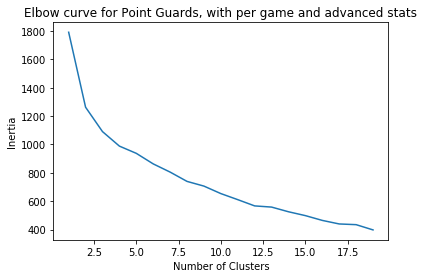

In [5]:
cluster_number = range(1, 20)
pg_kmeans_models = [KMeans(n_clusters=i) for i in cluster_number]
pg_inertia = [pg_kmeans_models[i].fit(X).inertia_ for i in range(len(pg_kmeans_models))]
plt.plot(cluster_number, pg_inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Point Guards, with per game and advanced stats')
plt.savefig('Figures/PG/kmeans-full.png')
plt.show()

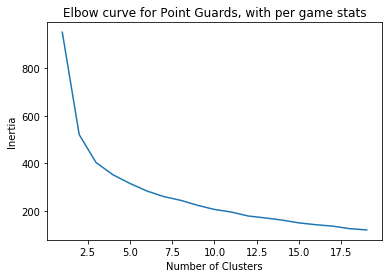

In [6]:
X_per_game_unscaled = point_guards_data.copy()
X_per_game_unscaled = X_per_game_unscaled.drop(['player_id', 'first_name', 'last_name', 'OffRtg', 'Floor%', 'DefRtg',
                                                'NetRtg', 'TS%', 'eFG%', 'FTARate', '3FGARate', 'OR%', 'DR%', 'BLK%',
                                                'TOV%', 'AST%', 'STL%', 'USG%'], 1)
scaler_per_game = StandardScaler()
scaler_per_game.fit(X_per_game_unscaled)
X_per_game = scaler_per_game.transform(X_per_game_unscaled)

pg_kmeans_models_per_game = [KMeans(n_clusters=i) for i in cluster_number]
pg_inertia_per_game = [pg_kmeans_models_per_game[i].fit(X_per_game).inertia_ for i in range(len(pg_kmeans_models_per_game))]
plt.plot(cluster_number, pg_inertia_per_game)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Point Guards, with per game stats')
plt.savefig('Figures/PG/kmeans-per-game.png')
plt.show()

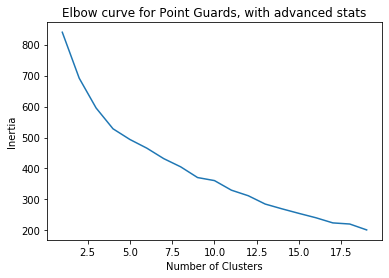

In [7]:
X_advanced_unscaled = point_guards_data.copy()
X_advanced_unscaled = X_advanced_unscaled.drop(['player_id', 'first_name', 'last_name', 'played_minutes_per_game',
                                                'scored_points_per_game', 'field_goals_made_per_game',
                                                'field_goals_miss_per_game', 'field_goals_attempts_per_game',
                                                'three_points_field_goals_made_per_game',
                                                'three_points_field_goals_attempts_per_game',
                                                'free_throws_made_per_game', 'free_throws_miss_per_game',
                                                'free_throws_attempts_per_game', 'assists_per_game',
                                                'offensive_rebounds_per_game', 'defensive_rebounds_per_game',
                                                'steals_per_game', 'blocks_per_game', 'turnovers_per_game',
                                                'personal_fouls_per_game'], 1)
scaler_advanced = StandardScaler()
scaler_advanced.fit(X_advanced_unscaled)
X_advanced = scaler_advanced.transform(X_advanced_unscaled)

pg_kmeans_models_advanced = [KMeans(n_clusters=i) for i in cluster_number]
pg_inertia_advanced = [pg_kmeans_models_advanced[i].fit(X_advanced).inertia_ for i in range(len(pg_kmeans_models_advanced))]
plt.plot(cluster_number, pg_inertia_advanced)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Point Guards, with advanced stats')
plt.savefig('Figures/PG/kmeans-advanced.png')
plt.show()

Analyzing the elbow curves we can conclude:
* For all statistics input the best number of clusters is 5.
* For per game statistics input the best number of clusters is 5.
* For advanced statistics input the best number of clusters is 5.

Now we build the models and compute the clusters and the analyze the cluster to evaluate which player aggrupation is
more logical.

In [8]:
# KMeans_pg_full = KMeans(n_clusters=5, n_init=20).fit(X)
# joblib.dump(KMeans_pg_full, 'Models/kmeans_pg_full.sav')

KMeans_pg_full = joblib.load('Models/kmeans_pg_full.sav')

pg_full_predicted_classes = KMeans_pg_full.predict(X)

pg_full = point_guards_data.copy()
pg_full.insert(1, 'Cluster', pg_full_predicted_classes)
pg_full

,player_id,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
5,201952,3,Jeff,Teague,1718.375,14.675,5.025,7.125,12.150,1.125,...,0.459877,0.341564,0.092593,1.931848,8.354866,0.927609,16.190933,30.857419,2.287033,26.465234
8,203471,1,Dennis,Schroder,1287.780,10.659,4.049,5.756,9.805,1.024,...,0.465174,0.196517,0.104478,2.250197,11.900240,0.464455,16.291015,35.776166,2.560490,26.949262
14,202738,0,Isaiah,Thomas,1970.095,21.524,6.976,9.714,16.690,1.976,...,0.477175,0.378031,0.118402,1.773351,7.956238,0.173411,12.048193,35.235339,1.746347,29.277731
21,2590,4,Mo,Williams,1390.269,10.346,3.962,4.885,8.846,1.038,...,0.506522,0.173913,0.117391,0.774408,10.966983,0.566511,15.953836,25.157019,0.808380,22.961354
26,203521,4,Matthew,Dellavedova,1623.132,8.474,3.105,3.974,7.079,1.395,...,0.537175,0.137546,0.197026,2.155750,7.893058,0.415005,15.667494,27.954513,1.526532,15.451690
31,201950,3,Jrue,Holiday,1503.722,13.639,5.056,6.472,11.528,1.222,...,0.491566,0.253012,0.106024,1.407732,11.892843,1.207312,14.147431,45.109685,2.348492,32.609328
34,202397,2,Ish,Smith,1336.462,8.615,3.500,4.500,8.000,0.385,...,0.461538,0.192308,0.048077,2.591857,16.348139,0.868096,16.320475,49.570971,2.012297,25.495647
37,2550,1,Kirk,Hinrich,930.885,4.192,1.462,1.962,3.423,0.692,...,0.528090,0.179775,0.202247,1.075648,7.977219,0.183137,17.235436,14.973008,1.426511,12.377425
39,201166,1,Aaron,Brooks,973.633,7.633,2.867,4.100,6.967,1.133,...,0.492823,0.138756,0.162679,2.896716,8.012168,0.758751,11.564843,23.124694,0.752200,22.163245
40,201565,3,Derrick,Rose,1916.257,15.714,6.457,9.486,15.943,0.657,...,0.425627,0.170251,0.041219,1.746747,8.199980,0.660883,13.672999,24.367607,0.982764,26.744208


In [9]:
pg_full_cluster_size = pd.DataFrame()
pg_full_cluster_size['Cluster'] = [0, 1, 2, 3, 4]
pg_full_cluster_size['Players'] = pg_full.groupby('Cluster').size()
pg_full_cluster_size

,Cluster,Players
0,0,4
1,1,13
2,2,7
3,3,13
4,4,13


In [10]:
# KMeans_pg_per_game = KMeans(n_clusters=5, n_init=20).fit(X_per_game)
# joblib.dump(KMeans_pg_per_game, 'Models/kmeans_pg_per_game.sav')

KMeans_pg_per_game = joblib.load('Models/kmeans_pg_per_game.sav')
pg_per_game_predicted_classes = KMeans_pg_per_game.predict(X_per_game)

pg_per_game = point_guards_data.copy()
pg_per_game.insert(1, 'Cluster', pg_per_game_predicted_classes)
pg_per_game

,player_id,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
5,201952,3,Jeff,Teague,1718.375,14.675,5.025,7.125,12.150,1.125,...,0.459877,0.341564,0.092593,1.931848,8.354866,0.927609,16.190933,30.857419,2.287033,26.465234
8,203471,1,Dennis,Schroder,1287.780,10.659,4.049,5.756,9.805,1.024,...,0.465174,0.196517,0.104478,2.250197,11.900240,0.464455,16.291015,35.776166,2.560490,26.949262
14,202738,0,Isaiah,Thomas,1970.095,21.524,6.976,9.714,16.690,1.976,...,0.477175,0.378031,0.118402,1.773351,7.956238,0.173411,12.048193,35.235339,1.746347,29.277731
21,2590,1,Mo,Williams,1390.269,10.346,3.962,4.885,8.846,1.038,...,0.506522,0.173913,0.117391,0.774408,10.966983,0.566511,15.953836,25.157019,0.808380,22.961354
26,203521,1,Matthew,Dellavedova,1623.132,8.474,3.105,3.974,7.079,1.395,...,0.537175,0.137546,0.197026,2.155750,7.893058,0.415005,15.667494,27.954513,1.526532,15.451690
31,201950,3,Jrue,Holiday,1503.722,13.639,5.056,6.472,11.528,1.222,...,0.491566,0.253012,0.106024,1.407732,11.892843,1.207312,14.147431,45.109685,2.348492,32.609328
34,202397,1,Ish,Smith,1336.462,8.615,3.500,4.500,8.000,0.385,...,0.461538,0.192308,0.048077,2.591857,16.348139,0.868096,16.320475,49.570971,2.012297,25.495647
37,2550,4,Kirk,Hinrich,930.885,4.192,1.462,1.962,3.423,0.692,...,0.528090,0.179775,0.202247,1.075648,7.977219,0.183137,17.235436,14.973008,1.426511,12.377425
39,201166,4,Aaron,Brooks,973.633,7.633,2.867,4.100,6.967,1.133,...,0.492823,0.138756,0.162679,2.896716,8.012168,0.758751,11.564843,23.124694,0.752200,22.163245
40,201565,3,Derrick,Rose,1916.257,15.714,6.457,9.486,15.943,0.657,...,0.425627,0.170251,0.041219,1.746747,8.199980,0.660883,13.672999,24.367607,0.982764,26.744208


In [11]:
pg_per_game_cluster_size = pd.DataFrame()
pg_per_game_cluster_size['Cluster'] = [0, 1, 2, 3, 4]
pg_per_game_cluster_size['Players'] = pg_per_game.groupby('Cluster').size()
pg_per_game_cluster_size

,Cluster,Players
0,0,9
1,1,20
2,2,4
3,3,12
4,4,11


In [12]:
# KMeans_pg_advanced = KMeans(n_clusters=5, n_init=20).fit(X_advanced)
# joblib.dump(KMeans_pg_advanced, 'Models/kmeans_pg_advanced.sav')

KMeans_pg_advanced = joblib.load('Models/kmeans_pg_advanced.sav')
pg_advanced_predicted_classes = KMeans_pg_advanced.predict(X_advanced)

pg_advanced = point_guards_data.copy()
pg_advanced.insert(1, 'Cluster', pg_advanced_predicted_classes)
pg_advanced

,player_id,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
5,201952,1,Jeff,Teague,1718.375,14.675,5.025,7.125,12.150,1.125,...,0.459877,0.341564,0.092593,1.931848,8.354866,0.927609,16.190933,30.857419,2.287033,26.465234
8,203471,1,Dennis,Schroder,1287.780,10.659,4.049,5.756,9.805,1.024,...,0.465174,0.196517,0.104478,2.250197,11.900240,0.464455,16.291015,35.776166,2.560490,26.949262
14,202738,3,Isaiah,Thomas,1970.095,21.524,6.976,9.714,16.690,1.976,...,0.477175,0.378031,0.118402,1.773351,7.956238,0.173411,12.048193,35.235339,1.746347,29.277731
21,2590,1,Mo,Williams,1390.269,10.346,3.962,4.885,8.846,1.038,...,0.506522,0.173913,0.117391,0.774408,10.966983,0.566511,15.953836,25.157019,0.808380,22.961354
26,203521,4,Matthew,Dellavedova,1623.132,8.474,3.105,3.974,7.079,1.395,...,0.537175,0.137546,0.197026,2.155750,7.893058,0.415005,15.667494,27.954513,1.526532,15.451690
31,201950,0,Jrue,Holiday,1503.722,13.639,5.056,6.472,11.528,1.222,...,0.491566,0.253012,0.106024,1.407732,11.892843,1.207312,14.147431,45.109685,2.348492,32.609328
34,202397,0,Ish,Smith,1336.462,8.615,3.500,4.500,8.000,0.385,...,0.461538,0.192308,0.048077,2.591857,16.348139,0.868096,16.320475,49.570971,2.012297,25.495647
37,2550,4,Kirk,Hinrich,930.885,4.192,1.462,1.962,3.423,0.692,...,0.528090,0.179775,0.202247,1.075648,7.977219,0.183137,17.235436,14.973008,1.426511,12.377425
39,201166,4,Aaron,Brooks,973.633,7.633,2.867,4.100,6.967,1.133,...,0.492823,0.138756,0.162679,2.896716,8.012168,0.758751,11.564843,23.124694,0.752200,22.163245
40,201565,1,Derrick,Rose,1916.257,15.714,6.457,9.486,15.943,0.657,...,0.425627,0.170251,0.041219,1.746747,8.199980,0.660883,13.672999,24.367607,0.982764,26.744208


In [13]:
pg_advanced_cluster_size = pd.DataFrame()
pg_advanced_cluster_size['Cluster'] = [0, 1, 2, 3, 4]
pg_advanced_cluster_size['Players'] = pg_advanced.groupby('Cluster').size()
pg_advanced_cluster_size.to_csv('Data/pg.csv')
pg_advanced_cluster_size


,Cluster,Players
0,0,6
1,1,20
2,2,5
3,3,11
4,4,14


Now we are going to extract the mean stats and members for each cluster.
#### Model fitted with all stats.

In [14]:
pg_full['played_minutes_per_game'] = pg_full['played_minutes_per_game'].apply(lambda sec: sec/60)

In [15]:
pd.set_option('display.float_format', '{:.2f}'.format)
pg_full_cluster0 = pg_full[pg_full['Cluster'] == 0]
pg_full_cluster0 = pg_full_cluster0.drop(['player_id'], 1)
pg_full_cluster0

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
14,0,Isaiah,Thomas,32.83,21.52,6.98,9.71,16.69,1.98,5.98,...,0.48,0.38,0.12,1.77,7.96,0.17,12.05,35.24,1.75,29.28
71,0,Stephen,Curry,33.63,30.02,9.90,9.55,19.45,4.83,10.70,...,0.63,0.30,0.25,2.76,13.82,0.33,13.53,35.54,3.11,33.78
192,0,Damian,Lillard,36.04,24.84,8.55,11.45,20.00,3.13,8.16,...,0.51,0.26,0.16,2.06,11.91,0.73,13.11,37.86,1.40,33.26
278,0,Kemba,Walker,35.42,20.76,7.26,9.29,16.55,1.86,4.91,...,0.49,0.31,0.11,2.49,12.39,1.54,10.74,31.75,2.51,31.36


In [16]:
pg_full_cluster0.mean()

Cluster                                        0.00
played_minutes_per_game                       34.48
scored_points_per_game                        24.29
field_goals_made_per_game                      8.17
field_goals_miss_per_game                     10.00
field_goals_attempts_per_game                 18.17
three_points_field_goals_made_per_game         2.95
three_points_field_goals_attempts_per_game     7.43
free_throws_made_per_game                      5.00
free_throws_miss_per_game                      0.65
free_throws_attempts_per_game                  5.65
assists_per_game                               6.35
offensive_rebounds_per_game                    0.69
defensive_rebounds_per_game                    3.55
steals_per_game                                1.47
blocks_per_game                                0.29
turnovers_per_game                             2.94
personal_fouls_per_game                        2.01
OffRtg                                       124.50
Floor%      

With the information of the Cluster 0 showed above we can determinate that the point guards in this cluster are starter
or important role players that plays over 22 minutes per game. They are good defenders and they have good play vision
that allow their to assists.

In [17]:
pd.set_option('display.float_format', '{:.2f}'.format)
pg_full_cluster1 = pg_full[pg_full['Cluster'] == 1]
pg_full_cluster1 = pg_full_cluster1.drop(['player_id'], 1)
pg_full_cluster1

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
8,1,Dennis,Schroder,21.46,10.66,4.05,5.76,9.80,1.02,3.15,...,0.47,0.20,0.10,2.25,11.90,0.46,16.29,35.78,2.56,26.95
37,1,Kirk,Hinrich,15.51,4.19,1.46,1.96,3.42,0.69,1.61,...,0.53,0.18,0.20,1.08,7.98,0.18,17.24,14.97,1.43,12.38
39,1,Aaron,Brooks,16.23,7.63,2.87,4.10,6.97,1.13,2.90,...,0.49,0.14,0.16,2.90,8.01,0.76,11.56,23.12,0.75,22.16
50,1,Raymond,Felton,26.45,8.98,3.21,4.83,8.05,0.88,2.76,...,0.45,0.25,0.11,1.45,12.84,0.53,15.56,23.35,1.68,20.27
56,1,Jameer,Nelson,27.36,8.14,3.08,5.22,8.31,1.14,3.86,...,0.44,0.12,0.14,2.17,10.95,0.44,16.91,29.69,1.37,17.57
81,1,Ty,Lawson,24.01,6.42,2.39,3.72,6.11,0.61,1.89,...,0.44,0.24,0.10,2.40,6.47,0.30,20.83,25.72,2.18,15.76
139,1,Shane,Larkin,20.26,6.84,2.76,3.32,6.08,0.59,1.46,...,0.50,0.16,0.10,1.21,11.29,0.57,19.97,28.60,3.17,18.33
149,1,Jerian,Grant,15.83,4.88,1.69,3.14,4.83,0.17,1.09,...,0.37,0.33,0.03,1.77,10.40,0.48,16.79,22.90,1.70,19.08
157,1,Shabazz,Napier,12.08,4.11,1.36,2.64,4.00,0.58,1.86,...,0.41,0.25,0.15,1.81,7.53,0.21,18.38,24.14,2.07,20.18
164,1,Rodney,Stuckey,25.15,9.55,3.55,5.16,8.71,0.29,1.39,...,0.42,0.30,0.03,2.12,12.95,0.53,12.82,16.81,1.58,20.03


In [18]:
pg_full_cluster1.mean()

Cluster                                        1.00
played_minutes_per_game                       19.63
scored_points_per_game                         6.60
field_goals_made_per_game                      2.43
field_goals_miss_per_game                      3.69
field_goals_attempts_per_game                  6.12
three_points_field_goals_made_per_game         0.74
three_points_field_goals_attempts_per_game     2.21
free_throws_made_per_game                      0.99
free_throws_miss_per_game                      0.25
free_throws_attempts_per_game                  1.24
assists_per_game                               3.00
offensive_rebounds_per_game                    0.32
defensive_rebounds_per_game                    1.72
steals_per_game                                0.69
blocks_per_game                                0.10
turnovers_per_game                             1.38
personal_fouls_per_game                        1.57
OffRtg                                       110.16
Floor%      

For the cluster 1, the point guards play 34 minutes per game, so it indicates that they are stars point guards their
teams. They score amount of points per game but with good Offensive rate, this means that the are reliable scorers. They
also have good defensive ratings, but probably because they don´t defend the rival main scorer.

In [19]:
pd.set_option('display.float_format', '{:.2f}'.format)
pg_full_cluster2 = pg_full[pg_full['Cluster'] == 2]
pg_full_cluster2 = pg_full_cluster2.drop(['player_id'], 1)
pg_full_cluster2

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
34,2,Ish,Smith,22.27,8.62,3.50,4.50,8.00,0.39,1.23,...,0.46,0.19,0.05,2.59,16.35,0.87,16.32,49.57,2.01,25.50
49,2,Devin,Harris,20.03,7.57,2.68,3.11,5.78,0.70,2.08,...,0.52,0.38,0.12,2.02,10.58,0.91,11.99,19.40,2.66,19.42
67,2,Shaun,Livingston,19.96,6.21,2.69,2.46,5.15,0.03,0.28,...,0.52,0.16,0.00,3.85,6.56,1.04,13.28,21.18,1.34,14.22
148,2,Langston,Galloway,23.36,7.47,2.71,3.76,6.47,0.93,2.47,...,0.49,0.22,0.14,2.23,13.27,0.75,8.86,14.11,1.79,15.09
177,2,TJ,McConnell,21.40,5.83,2.54,3.10,5.63,0.46,1.32,...,0.49,0.07,0.08,3.23,18.00,0.55,26.05,41.79,3.08,18.21
210,2,Tony,Parker,26.94,12.71,5.26,4.71,9.97,0.37,0.84,...,0.55,0.24,0.04,1.38,9.37,0.47,12.90,31.31,1.64,22.93
259,2,Ramon,Sessions,21.21,10.10,3.40,3.77,7.17,0.45,1.45,...,0.51,0.52,0.06,1.49,12.73,0.30,13.28,22.36,1.83,21.54


In [20]:
pg_full_cluster2.mean()

Cluster                                        2.00
played_minutes_per_game                       22.17
scored_points_per_game                         8.36
field_goals_made_per_game                      3.25
field_goals_miss_per_game                      3.63
field_goals_attempts_per_game                  6.88
three_points_field_goals_made_per_game         0.48
three_points_field_goals_attempts_per_game     1.38
free_throws_made_per_game                      1.37
free_throws_miss_per_game                      0.41
free_throws_attempts_per_game                  1.78
assists_per_game                               3.67
offensive_rebounds_per_game                    0.44
defensive_rebounds_per_game                    2.34
steals_per_game                                0.86
blocks_per_game                                0.19
turnovers_per_game                             1.31
personal_fouls_per_game                        1.71
OffRtg                                       124.50
Floor%      

Point guards in cluster 2 will be starters in their teams, but not the first option in offensive side. They can score
easily, as seen in Offensive rating. They are also good assistants.

In [21]:
pd.set_option('display.float_format', '{:.2f}'.format)
pg_full_cluster3 = pg_full[pg_full['Cluster'] == 3]
pg_full_cluster3 = pg_full_cluster3.drop(['player_id'], 1)
pg_full_cluster3

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
5,3,Jeff,Teague,28.64,14.68,5.03,7.12,12.15,1.12,2.85,...,0.46,0.34,0.09,1.93,8.35,0.93,16.19,30.86,2.29,26.47
31,3,Jrue,Holiday,25.06,13.64,5.06,6.47,11.53,1.22,3.17,...,0.49,0.25,0.11,1.41,11.89,1.21,14.15,45.11,2.35,32.61
40,3,Derrick,Rose,31.94,15.71,6.46,9.49,15.94,0.66,2.37,...,0.43,0.17,0.04,1.75,8.20,0.66,13.67,24.37,0.98,26.74
52,3,Deron,Williams,32.64,14.69,5.26,7.14,12.40,1.49,4.26,...,0.48,0.24,0.12,1.11,10.40,0.74,15.34,33.78,1.68,25.20
65,3,Emanuel,Mudiay,29.33,11.07,4.10,8.62,12.72,0.83,3.14,...,0.36,0.24,0.07,2.38,11.14,1.83,20.65,32.41,1.71,27.61
109,3,Goran,Dragic,31.92,12.41,5.00,5.68,10.68,0.97,2.82,...,0.51,0.18,0.09,2.64,9.63,0.52,17.28,26.88,1.73,21.37
118,3,Michael,Carter-Williams,30.82,11.95,4.85,5.85,10.70,0.28,0.82,...,0.47,0.28,0.03,3.74,16.05,1.97,19.56,34.05,2.92,24.56
125,3,Ricky,Rubio,30.17,9.50,2.71,5.16,7.87,0.66,2.21,...,0.39,0.53,0.08,3.07,14.19,0.23,20.00,44.11,3.95,18.27
133,3,Jarrett,Jack,31.65,12.87,4.42,6.71,11.13,0.94,3.13,...,0.44,0.31,0.08,1.04,14.41,0.61,18.82,36.13,1.83,22.54
158,3,Elfrid,Payton,29.57,11.38,4.57,6.22,10.78,0.41,1.11,...,0.44,0.28,0.04,4.02,10.32,0.58,16.90,31.95,2.52,22.06


In [22]:
pg_full_cluster3.mean()

Cluster                                        3.00
played_minutes_per_game                       30.00
scored_points_per_game                        13.41
field_goals_made_per_game                      4.90
field_goals_miss_per_game                      6.98
field_goals_attempts_per_game                 11.88
three_points_field_goals_made_per_game         0.95
three_points_field_goals_attempts_per_game     2.86
free_throws_made_per_game                      2.66
free_throws_miss_per_game                      0.69
free_throws_attempts_per_game                  3.34
assists_per_game                               5.73
offensive_rebounds_per_game                    0.61
defensive_rebounds_per_game                    2.92
steals_per_game                                1.15
blocks_per_game                                0.33
turnovers_per_game                             2.55
personal_fouls_per_game                        2.22
OffRtg                                       111.80
Floor%      

In cluster 3 the point guards seem to be assistant point guards without much score responsability, Playmakers. Good
defenders, but not defensive specialists.


In [23]:
pd.set_option('display.float_format', '{:.2f}'.format)
pg_full_cluster4 = pg_full[pg_full['Cluster'] == 4]
pg_full_cluster4 = pg_full_cluster4.drop(['player_id'], 1)
pg_full_cluster4

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
21,4,Mo,Williams,23.17,10.35,3.96,4.88,8.85,1.04,3.04,...,0.51,0.17,0.12,0.77,10.97,0.57,15.95,25.16,0.81,22.96
26,4,Matthew,Dellavedova,27.05,8.47,3.10,3.97,7.08,1.40,3.10,...,0.54,0.14,0.20,2.16,7.89,0.42,15.67,27.95,1.53,15.45
53,4,Jose Juan,Barea,21.85,9.54,3.65,4.97,8.62,1.27,3.40,...,0.50,0.14,0.15,1.86,8.82,0.21,15.68,37.45,0.99,25.23
82,4,Patrick,Beverly,25.83,9.09,3.27,4.39,7.67,1.79,4.06,...,0.54,0.14,0.23,2.84,8.71,0.91,14.06,15.88,2.39,16.27
104,4,D'Angelo,Russel,26.88,12.24,4.83,6.74,11.57,1.52,4.69,...,0.48,0.13,0.13,2.65,14.03,0.51,15.60,25.30,2.29,25.46
141,4,Jose,Calderon,28.27,7.49,2.84,3.18,6.02,1.18,2.82,...,0.57,0.12,0.20,1.57,10.62,0.31,15.17,21.23,1.91,11.98
165,4,George,Hill,34.84,13.03,4.80,5.83,10.63,1.97,4.46,...,0.54,0.19,0.19,2.44,10.10,0.61,11.44,14.43,2.10,16.57
170,4,Holis,Thompson,27.13,8.92,3.21,4.54,7.74,1.79,4.54,...,0.53,0.14,0.23,2.57,12.51,0.98,13.01,8.39,0.83,17.28
172,4,Isaiah,Canaan,25.88,10.80,3.27,5.92,9.20,2.25,6.20,...,0.48,0.27,0.24,1.09,8.92,0.70,12.35,13.80,1.45,22.47
180,4,Ronnie,Price,14.93,4.33,1.42,2.27,3.70,0.97,2.52,...,0.52,0.16,0.26,2.31,6.55,0.88,15.55,17.29,3.76,13.64


In [24]:
pg_full_cluster4.mean()

Cluster                                        4.00
played_minutes_per_game                       25.40
scored_points_per_game                         9.82
field_goals_made_per_game                      3.63
field_goals_miss_per_game                      4.83
field_goals_attempts_per_game                  8.46
three_points_field_goals_made_per_game         1.48
three_points_field_goals_attempts_per_game     3.84
free_throws_made_per_game                      1.09
free_throws_miss_per_game                      0.29
free_throws_attempts_per_game                  1.37
assists_per_game                               3.06
offensive_rebounds_per_game                    0.43
defensive_rebounds_per_game                    2.10
steals_per_game                                0.84
blocks_per_game                                0.16
turnovers_per_game                             1.44
personal_fouls_per_game                        1.93
OffRtg                                       122.47
Floor%      

As seen above, in cluster 4 the point guards are mediocre players. They don't do not stand out in any statistics.
They are starter point guards in bad or mediocre teams.

#### Model fitted with per game stats.

In [25]:
pg_per_game['played_minutes_per_game'] = pg_per_game['played_minutes_per_game'].apply(lambda sec: sec/60)

In [26]:
pd.set_option('display.float_format', '{:.2f}'.format)
pg_per_game_cluster0 = pg_per_game[pg_per_game['Cluster'] == 0]
pg_per_game_cluster0 = pg_per_game_cluster0.drop(['player_id'], 1)
pg_per_game_cluster0

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
14,0,Isaiah,Thomas,32.83,21.52,6.98,9.71,16.69,1.98,5.98,...,0.48,0.38,0.12,1.77,7.96,0.17,12.05,35.24,1.75,29.28
71,0,Stephen,Curry,33.63,30.02,9.90,9.55,19.45,4.83,10.70,...,0.63,0.30,0.25,2.76,13.82,0.33,13.53,35.54,3.11,33.78
89,0,Chris,Paul,32.46,18.29,6.57,8.09,14.66,1.43,3.71,...,0.50,0.29,0.10,2.11,10.81,0.36,14.37,50.11,3.38,26.65
182,0,Eric,Bledsoe,34.08,20.63,7.30,8.70,16.00,1.60,4.23,...,0.51,0.34,0.10,1.89,11.73,1.61,16.35,31.72,3.17,28.13
192,0,Damian,Lillard,36.04,24.84,8.55,11.45,20.00,3.13,8.16,...,0.51,0.26,0.16,2.06,11.91,0.73,13.11,37.86,1.40,33.26
220,0,Russell,Westbrook,33.43,24.14,8.43,10.09,18.52,1.18,4.14,...,0.49,0.40,0.06,5.94,17.39,0.63,16.39,51.09,3.87,34.64
229,0,Kyle,Lowry,36.14,20.64,6.62,8.98,15.60,2.74,7.09,...,0.51,0.34,0.18,2.11,13.52,1.32,14.44,31.78,3.44,26.65
261,0,John,Wall,35.52,19.52,7.38,9.72,17.10,1.48,4.25,...,0.47,0.25,0.09,2.11,11.91,1.71,18.57,46.07,2.95,29.46
278,0,Kemba,Walker,35.42,20.76,7.26,9.29,16.55,1.86,4.91,...,0.49,0.31,0.11,2.49,12.39,1.54,10.74,31.75,2.51,31.36


In [27]:
pg_per_game_cluster0.mean()

Cluster                                        0.00
played_minutes_per_game                       34.40
scored_points_per_game                        22.26
field_goals_made_per_game                      7.67
field_goals_miss_per_game                      9.51
field_goals_attempts_per_game                 17.17
three_points_field_goals_made_per_game         2.25
three_points_field_goals_attempts_per_game     5.91
free_throws_made_per_game                      4.69
free_throws_miss_per_game                      0.79
free_throws_attempts_per_game                  5.47
assists_per_game                               7.45
offensive_rebounds_per_game                    0.77
defensive_rebounds_per_game                    3.79
steals_per_game                                1.88
blocks_per_game                                0.39
turnovers_per_game                             3.30
personal_fouls_per_game                        2.35
OffRtg                                       124.64
Floor%      

In cluster 0 the point guards grouped are superstars that play a lot of minutes and have high usage in their teams.

In [28]:
pd.set_option('display.float_format', '{:.2f}'.format)
pg_per_game_cluster1 = pg_per_game[pg_per_game['Cluster'] == 1]
pg_per_game_cluster1 = pg_per_game_cluster1.drop(['player_id'], 1)
pg_per_game_cluster1

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
8,1,Dennis,Schroder,21.46,10.66,4.05,5.76,9.80,1.02,3.15,...,0.47,0.20,0.10,2.25,11.90,0.46,16.29,35.78,2.56,26.95
21,1,Mo,Williams,23.17,10.35,3.96,4.88,8.85,1.04,3.04,...,0.51,0.17,0.12,0.77,10.97,0.57,15.95,25.16,0.81,22.96
26,1,Matthew,Dellavedova,27.05,8.47,3.10,3.97,7.08,1.40,3.10,...,0.54,0.14,0.20,2.16,7.89,0.42,15.67,27.95,1.53,15.45
34,1,Ish,Smith,22.27,8.62,3.50,4.50,8.00,0.39,1.23,...,0.46,0.19,0.05,2.59,16.35,0.87,16.32,49.57,2.01,25.50
49,1,Devin,Harris,20.03,7.57,2.68,3.11,5.78,0.70,2.08,...,0.52,0.38,0.12,2.02,10.58,0.91,11.99,19.40,2.66,19.42
50,1,Raymond,Felton,26.45,8.98,3.21,4.83,8.05,0.88,2.76,...,0.45,0.25,0.11,1.45,12.84,0.53,15.56,23.35,1.68,20.27
53,1,Jose Juan,Barea,21.85,9.54,3.65,4.97,8.62,1.27,3.40,...,0.50,0.14,0.15,1.86,8.82,0.21,15.68,37.45,0.99,25.23
56,1,Jameer,Nelson,27.36,8.14,3.08,5.22,8.31,1.14,3.86,...,0.44,0.12,0.14,2.17,10.95,0.44,16.91,29.69,1.37,17.57
81,1,Ty,Lawson,24.01,6.42,2.39,3.72,6.11,0.61,1.89,...,0.44,0.24,0.10,2.40,6.47,0.30,20.83,25.72,2.18,15.76
82,1,Patrick,Beverly,25.83,9.09,3.27,4.39,7.67,1.79,4.06,...,0.54,0.14,0.23,2.84,8.71,0.91,14.06,15.88,2.39,16.27


In [29]:
pg_per_game_cluster1.mean()

Cluster                                        1.00
played_minutes_per_game                       24.63
scored_points_per_game                         9.31
field_goals_made_per_game                      3.47
field_goals_miss_per_game                      4.58
field_goals_attempts_per_game                  8.05
three_points_field_goals_made_per_game         1.03
three_points_field_goals_attempts_per_game     2.85
free_throws_made_per_game                      1.34
free_throws_miss_per_game                      0.36
free_throws_attempts_per_game                  1.70
assists_per_game                               3.57
offensive_rebounds_per_game                    0.42
defensive_rebounds_per_game                    2.28
steals_per_game                                0.81
blocks_per_game                                0.16
turnovers_per_game                             1.52
personal_fouls_per_game                        1.85
OffRtg                                       118.85
Floor%      

For cluster 1 the grouped point guards seem to be starter or six men with much minutes played per game. They are good
role players.

In [30]:
pd.set_option('display.float_format', '{:.2f}'.format)
pg_per_game_cluster2 = pg_per_game[pg_per_game['Cluster'] == 2]
pg_per_game_cluster2 = pg_per_game_cluster2.drop(['player_id'], 1)
pg_per_game_cluster2

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
118,2,Michael,Carter-Williams,30.82,11.95,4.85,5.85,10.70,0.28,0.82,...,0.47,0.28,0.03,3.74,16.05,1.97,19.56,34.05,2.92,24.56
125,2,Ricky,Rubio,30.17,9.50,2.71,5.16,7.87,0.66,2.21,...,0.39,0.53,0.08,3.07,14.19,0.23,20.00,44.11,3.95,18.27
158,2,Elfrid,Payton,29.57,11.38,4.57,6.22,10.78,0.41,1.11,...,0.44,0.28,0.04,4.02,10.32,0.58,16.90,31.95,2.52,22.06
200,2,Rajon,Rondo,35.15,11.84,4.95,5.89,10.84,0.66,2.05,...,0.49,0.22,0.06,3.89,16.15,0.46,24.20,48.25,2.60,18.89


In [31]:
pg_per_game_cluster2.mean()

Cluster                                        2.00
played_minutes_per_game                       31.43
scored_points_per_game                        11.17
field_goals_made_per_game                      4.27
field_goals_miss_per_game                      5.78
field_goals_attempts_per_game                 10.05
three_points_field_goals_made_per_game         0.50
three_points_field_goals_attempts_per_game     1.55
free_throws_made_per_game                      2.13
free_throws_miss_per_game                      0.99
free_throws_attempts_per_game                  3.12
assists_per_game                               8.05
offensive_rebounds_per_game                    0.99
defensive_rebounds_per_game                    3.93
steals_per_game                                1.78
blocks_per_game                                0.29
turnovers_per_game                             2.90
personal_fouls_per_game                        2.45
OffRtg                                       113.11
Floor%      

In cluster 2 the are good starter that are reliable scorers and acceptable defenders. They are excellent assistants.

In [32]:
pd.set_option('display.float_format', '{:.2f}'.format)
pg_per_game_cluster3 = pg_per_game[pg_per_game['Cluster'] == 3]
pg_per_game_cluster3 = pg_per_game_cluster3.drop(['player_id'], 1)
pg_per_game_cluster3

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
5,3,Jeff,Teague,28.64,14.68,5.03,7.12,12.15,1.12,2.85,...,0.46,0.34,0.09,1.93,8.35,0.93,16.19,30.86,2.29,26.47
31,3,Jrue,Holiday,25.06,13.64,5.06,6.47,11.53,1.22,3.17,...,0.49,0.25,0.11,1.41,11.89,1.21,14.15,45.11,2.35,32.61
40,3,Derrick,Rose,31.94,15.71,6.46,9.49,15.94,0.66,2.37,...,0.43,0.17,0.04,1.75,8.20,0.66,13.67,24.37,0.98,26.74
52,3,Deron,Williams,32.64,14.69,5.26,7.14,12.40,1.49,4.26,...,0.48,0.24,0.12,1.11,10.40,0.74,15.34,33.78,1.68,25.20
65,3,Emanuel,Mudiay,29.33,11.07,4.10,8.62,12.72,0.83,3.14,...,0.36,0.24,0.07,2.38,11.14,1.83,20.65,32.41,1.71,27.61
104,3,D'Angelo,Russel,26.88,12.24,4.83,6.74,11.57,1.52,4.69,...,0.48,0.13,0.13,2.65,14.03,0.51,15.60,25.30,2.29,25.46
109,3,Goran,Dragic,31.92,12.41,5.00,5.68,10.68,0.97,2.82,...,0.51,0.18,0.09,2.64,9.63,0.52,17.28,26.88,1.73,21.37
133,3,Jarrett,Jack,31.65,12.87,4.42,6.71,11.13,0.94,3.13,...,0.44,0.31,0.08,1.04,14.41,0.61,18.82,36.13,1.83,22.54
165,3,George,Hill,34.84,13.03,4.80,5.83,10.63,1.97,4.46,...,0.54,0.19,0.19,2.44,10.10,0.61,11.44,14.43,2.10,16.57
251,3,Mike,Conley,31.31,15.03,5.14,7.47,12.61,1.47,4.11,...,0.47,0.31,0.12,1.93,9.58,0.95,9.32,36.33,1.98,25.19


In [33]:
pg_per_game_cluster3.mean()

Cluster                                        3.00
played_minutes_per_game                       30.10
scored_points_per_game                        13.90
field_goals_made_per_game                      5.10
field_goals_miss_per_game                      7.17
field_goals_attempts_per_game                 12.27
three_points_field_goals_made_per_game         1.21
three_points_field_goals_attempts_per_game     3.52
free_throws_made_per_game                      2.48
free_throws_miss_per_game                      0.58
free_throws_attempts_per_game                  3.07
assists_per_game                               5.06
offensive_rebounds_per_game                    0.55
defensive_rebounds_per_game                    2.81
steals_per_game                                1.02
blocks_per_game                                0.32
turnovers_per_game                             2.42
personal_fouls_per_game                        2.10
OffRtg                                       114.01
Floor%      

Point guards in cluster 3 are starters and seems to be the second options in their teams offense.

In [34]:
pd.set_option('display.float_format', '{:.2f}'.format)
pg_per_game_cluster4 = pg_per_game[pg_per_game['Cluster'] == 4]
pg_per_game_cluster4 = pg_per_game_cluster4.drop(['player_id'], 1)
pg_per_game_cluster4

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
37,4,Kirk,Hinrich,15.51,4.19,1.46,1.96,3.42,0.69,1.61,...,0.53,0.18,0.20,1.08,7.98,0.18,17.24,14.97,1.43,12.38
39,4,Aaron,Brooks,16.23,7.63,2.87,4.10,6.97,1.13,2.90,...,0.49,0.14,0.16,2.90,8.01,0.76,11.56,23.12,0.75,22.16
67,4,Shaun,Livingston,19.96,6.21,2.69,2.46,5.15,0.03,0.28,...,0.52,0.16,0.00,3.85,6.56,1.04,13.28,21.18,1.34,14.22
139,4,Shane,Larkin,20.26,6.84,2.76,3.32,6.08,0.59,1.46,...,0.50,0.16,0.10,1.21,11.29,0.57,19.97,28.60,3.17,18.33
149,4,Jerian,Grant,15.83,4.88,1.69,3.14,4.83,0.17,1.09,...,0.37,0.33,0.03,1.77,10.40,0.48,16.79,22.90,1.70,19.08
157,4,Shabazz,Napier,12.08,4.11,1.36,2.64,4.00,0.58,1.86,...,0.41,0.25,0.15,1.81,7.53,0.21,18.38,24.14,2.07,20.18
180,4,Ronnie,Price,14.93,4.33,1.42,2.27,3.70,0.97,2.52,...,0.52,0.16,0.26,2.31,6.55,0.88,15.55,17.29,3.76,13.64
215,4,Patty,Mills,20.55,7.90,3.10,4.00,7.10,1.37,3.68,...,0.53,0.06,0.19,1.52,8.81,0.28,10.21,18.62,2.37,19.30
221,4,D.J.,Augustin,15.88,4.28,1.38,2.28,3.66,0.72,1.88,...,0.47,0.29,0.20,1.18,6.56,0.31,18.02,16.45,1.32,14.07
244,4,Raul,Neto,19.15,5.78,2.24,3.17,5.42,0.83,2.17,...,0.49,0.12,0.15,1.86,8.03,0.22,19.63,20.90,2.55,17.55


In [35]:
pg_per_game_cluster4.mean()

Cluster                                        4.00
played_minutes_per_game                       16.93
scored_points_per_game                         5.49
field_goals_made_per_game                      2.05
field_goals_miss_per_game                      2.91
field_goals_attempts_per_game                  4.96
three_points_field_goals_made_per_game         0.72
three_points_field_goals_attempts_per_game     2.01
free_throws_made_per_game                      0.67
free_throws_miss_per_game                      0.15
free_throws_attempts_per_game                  0.81
assists_per_game                               2.42
offensive_rebounds_per_game                    0.28
defensive_rebounds_per_game                    1.28
steals_per_game                                0.65
blocks_per_game                                0.11
turnovers_per_game                             1.05
personal_fouls_per_game                        1.52
OffRtg                                       116.16
Floor%      

For cluster 4 there is rotation point guards. They are established in the team's rotation, but they are not important.

#### KMeans fitted with advanced stats

In [36]:
pg_advanced['played_minutes_per_game'] = pg_advanced['played_minutes_per_game'].apply(lambda sec: sec/60)

In [37]:
pd.set_option('display.float_format', '{:.2f}'.format)
pg_advanced_cluster0 = pg_advanced[pg_advanced['Cluster'] == 0]
pg_advanced_cluster0 = pg_advanced_cluster0.drop(['player_id'], 1)
pg_advanced_cluster0

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
31,0,Jrue,Holiday,25.06,13.64,5.06,6.47,11.53,1.22,3.17,...,0.49,0.25,0.11,1.41,11.89,1.21,14.15,45.11,2.35,32.61
34,0,Ish,Smith,22.27,8.62,3.50,4.50,8.00,0.39,1.23,...,0.46,0.19,0.05,2.59,16.35,0.87,16.32,49.57,2.01,25.50
118,0,Michael,Carter-Williams,30.82,11.95,4.85,5.85,10.70,0.28,0.82,...,0.47,0.28,0.03,3.74,16.05,1.97,19.56,34.05,2.92,24.56
261,0,John,Wall,35.52,19.52,7.38,9.72,17.10,1.48,4.25,...,0.47,0.25,0.09,2.11,11.91,1.71,18.57,46.07,2.95,29.46
277,0,Jeremy,Lin,26.72,12.30,4.08,5.50,9.57,0.97,3.10,...,0.48,0.42,0.10,2.63,12.58,2.14,14.53,23.61,1.26,26.16
278,0,Kemba,Walker,35.42,20.76,7.26,9.29,16.55,1.86,4.91,...,0.49,0.31,0.11,2.49,12.39,1.54,10.74,31.75,2.51,31.36


In [38]:
pg_advanced_cluster0.mean()

Cluster                                        0.00
played_minutes_per_game                       29.30
scored_points_per_game                        14.47
field_goals_made_per_game                      5.35
field_goals_miss_per_game                      6.89
field_goals_attempts_per_game                 12.24
three_points_field_goals_made_per_game         1.03
three_points_field_goals_attempts_per_game     2.91
free_throws_made_per_game                      2.73
free_throws_miss_per_game                      0.73
free_throws_attempts_per_game                  3.46
assists_per_game                               5.68
offensive_rebounds_per_game                    0.64
defensive_rebounds_per_game                    3.17
steals_per_game                                1.34
blocks_per_game                                0.56
turnovers_per_game                             2.54
personal_fouls_per_game                        2.10
OffRtg                                       118.53
Floor%      

For the cluster 0 we have starters point guards that are no the primary scorer, but can produce points by assist or
making buckets. They have good shooting percentages.

In [39]:
pd.set_option('display.float_format', '{:.2f}'.format)
pg_advanced_cluster1 = pg_advanced[pg_advanced['Cluster'] == 1]
pg_advanced_cluster1 = pg_advanced_cluster1.drop(['player_id'], 1)
pg_advanced_cluster1

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
5,1,Jeff,Teague,28.64,14.68,5.03,7.12,12.15,1.12,2.85,...,0.46,0.34,0.09,1.93,8.35,0.93,16.19,30.86,2.29,26.47
8,1,Dennis,Schroder,21.46,10.66,4.05,5.76,9.80,1.02,3.15,...,0.47,0.20,0.10,2.25,11.90,0.46,16.29,35.78,2.56,26.95
21,1,Mo,Williams,23.17,10.35,3.96,4.88,8.85,1.04,3.04,...,0.51,0.17,0.12,0.77,10.97,0.57,15.95,25.16,0.81,22.96
40,1,Derrick,Rose,31.94,15.71,6.46,9.49,15.94,0.66,2.37,...,0.43,0.17,0.04,1.75,8.20,0.66,13.67,24.37,0.98,26.74
50,1,Raymond,Felton,26.45,8.98,3.21,4.83,8.05,0.88,2.76,...,0.45,0.25,0.11,1.45,12.84,0.53,15.56,23.35,1.68,20.27
52,1,Deron,Williams,32.64,14.69,5.26,7.14,12.40,1.49,4.26,...,0.48,0.24,0.12,1.11,10.40,0.74,15.34,33.78,1.68,25.20
53,1,Jose Juan,Barea,21.85,9.54,3.65,4.97,8.62,1.27,3.40,...,0.50,0.14,0.15,1.86,8.82,0.21,15.68,37.45,0.99,25.23
56,1,Jameer,Nelson,27.36,8.14,3.08,5.22,8.31,1.14,3.86,...,0.44,0.12,0.14,2.17,10.95,0.44,16.91,29.69,1.37,17.57
65,1,Emanuel,Mudiay,29.33,11.07,4.10,8.62,12.72,0.83,3.14,...,0.36,0.24,0.07,2.38,11.14,1.83,20.65,32.41,1.71,27.61
81,1,Ty,Lawson,24.01,6.42,2.39,3.72,6.11,0.61,1.89,...,0.44,0.24,0.10,2.40,6.47,0.30,20.83,25.72,2.18,15.76


In [40]:
pg_advanced_cluster1.mean()

Cluster                                        1.00
played_minutes_per_game                       23.77
scored_points_per_game                         9.29
field_goals_made_per_game                      3.41
field_goals_miss_per_game                      5.18
field_goals_attempts_per_game                  8.59
three_points_field_goals_made_per_game         0.94
three_points_field_goals_attempts_per_game     2.86
free_throws_made_per_game                      1.52
free_throws_miss_per_game                      0.36
free_throws_attempts_per_game                  1.88
assists_per_game                               3.82
offensive_rebounds_per_game                    0.36
defensive_rebounds_per_game                    2.15
steals_per_game                                0.79
blocks_per_game                                0.17
turnovers_per_game                             1.90
personal_fouls_per_game                        1.68
OffRtg                                       107.67
Floor%      

In cluster 1 there are starter point guards with low score ability, as seen in the mean offensive rating. They haven't
bad defensive rating, so they are decent defenders.

In [41]:
pd.set_option('display.float_format', '{:.2f}'.format)
pg_advanced_cluster2 = pg_advanced[pg_advanced['Cluster'] == 2]
pg_advanced_cluster2 = pg_advanced_cluster2.drop(['player_id'], 1)
pg_advanced_cluster2

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
125,2,Ricky,Rubio,30.17,9.50,2.71,5.16,7.87,0.66,2.21,...,0.39,0.53,0.08,3.07,14.19,0.23,20.00,44.11,3.95,18.27
158,2,Elfrid,Payton,29.57,11.38,4.57,6.22,10.78,0.41,1.11,...,0.44,0.28,0.04,4.02,10.32,0.58,16.90,31.95,2.52,22.06
177,2,TJ,McConnell,21.40,5.83,2.54,3.10,5.63,0.46,1.32,...,0.49,0.07,0.08,3.23,18.00,0.55,26.05,41.79,3.08,18.21
200,2,Rajon,Rondo,35.15,11.84,4.95,5.89,10.84,0.66,2.05,...,0.49,0.22,0.06,3.89,16.15,0.46,24.20,48.25,2.60,18.89
220,2,Russell,Westbrook,33.43,24.14,8.43,10.09,18.52,1.18,4.14,...,0.49,0.40,0.06,5.94,17.39,0.63,16.39,51.09,3.87,34.64


In [42]:
pg_advanced_cluster2.mean()

Cluster                                        2.00
played_minutes_per_game                       29.94
scored_points_per_game                        12.54
field_goals_made_per_game                      4.64
field_goals_miss_per_game                      6.09
field_goals_attempts_per_game                 10.73
three_points_field_goals_made_per_game         0.67
three_points_field_goals_attempts_per_game     2.17
free_throws_made_per_game                      2.59
free_throws_miss_per_game                      0.87
free_throws_attempts_per_game                  3.46
assists_per_game                               8.21
offensive_rebounds_per_game                    1.06
defensive_rebounds_per_game                    4.06
steals_per_game                                1.84
blocks_per_game                                0.17
turnovers_per_game                             3.00
personal_fouls_per_game                        2.22
OffRtg                                       120.12
Floor%      

In cluster 2 are point guard that can produces a lot of points by assists or by scoring. They are also notable defenders.
It is strange to see Russell Westbrook on this cluster.

In [43]:
pd.set_option('display.float_format', '{:.2f}'.format)
pg_advanced_cluster3 = pg_advanced[pg_advanced['Cluster'] == 3]
pg_advanced_cluster3 = pg_advanced_cluster3.drop(['player_id'], 1)
pg_advanced_cluster3

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
14,3,Isaiah,Thomas,32.83,21.52,6.98,9.71,16.69,1.98,5.98,...,0.48,0.38,0.12,1.77,7.96,0.17,12.05,35.24,1.75,29.28
49,3,Devin,Harris,20.03,7.57,2.68,3.11,5.78,0.70,2.08,...,0.52,0.38,0.12,2.02,10.58,0.91,11.99,19.40,2.66,19.42
71,3,Stephen,Curry,33.63,30.02,9.90,9.55,19.45,4.83,10.70,...,0.63,0.30,0.25,2.76,13.82,0.33,13.53,35.54,3.11,33.78
89,3,Chris,Paul,32.46,18.29,6.57,8.09,14.66,1.43,3.71,...,0.50,0.29,0.10,2.11,10.81,0.36,14.37,50.11,3.38,26.65
182,3,Eric,Bledsoe,34.08,20.63,7.30,8.70,16.00,1.60,4.23,...,0.51,0.34,0.10,1.89,11.73,1.61,16.35,31.72,3.17,28.13
192,3,Damian,Lillard,36.04,24.84,8.55,11.45,20.00,3.13,8.16,...,0.51,0.26,0.16,2.06,11.91,0.73,13.11,37.86,1.40,33.26
210,3,Tony,Parker,26.94,12.71,5.26,4.71,9.97,0.37,0.84,...,0.55,0.24,0.04,1.38,9.37,0.47,12.90,31.31,1.64,22.93
229,3,Kyle,Lowry,36.14,20.64,6.62,8.98,15.60,2.74,7.09,...,0.51,0.34,0.18,2.11,13.52,1.32,14.44,31.78,3.44,26.65
251,3,Mike,Conley,31.31,15.03,5.14,7.47,12.61,1.47,4.11,...,0.47,0.31,0.12,1.93,9.58,0.95,9.32,36.33,1.98,25.19
259,3,Ramon,Sessions,21.21,10.10,3.40,3.77,7.17,0.45,1.45,...,0.51,0.52,0.06,1.49,12.73,0.30,13.28,22.36,1.83,21.54


In [44]:
pg_advanced_cluster3.mean()

Cluster                                        3.00
played_minutes_per_game                       30.45
scored_points_per_game                        18.22
field_goals_made_per_game                      6.31
field_goals_miss_per_game                      7.71
field_goals_attempts_per_game                 14.02
three_points_field_goals_made_per_game         1.83
three_points_field_goals_attempts_per_game     4.77
free_throws_made_per_game                      3.77
free_throws_miss_per_game                      0.67
free_throws_attempts_per_game                  4.45
assists_per_game                               5.95
offensive_rebounds_per_game                    0.55
defensive_rebounds_per_game                    3.02
steals_per_game                                1.38
blocks_per_game                                0.24
turnovers_per_game                             2.47
personal_fouls_per_game                        2.17
OffRtg                                       124.35
Floor%      

In cluster 3 there are efficient scorers with much importance in their teams.

In [45]:
pd.set_option('display.float_format', '{:.2f}'.format)
pg_advanced_cluster4 = pg_advanced[pg_advanced['Cluster'] == 4]
pg_advanced_cluster4 = pg_advanced_cluster4.drop(['player_id'], 1)
pg_advanced_cluster4

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
26,4,Matthew,Dellavedova,27.05,8.47,3.10,3.97,7.08,1.40,3.10,...,0.54,0.14,0.20,2.16,7.89,0.42,15.67,27.95,1.53,15.45
37,4,Kirk,Hinrich,15.51,4.19,1.46,1.96,3.42,0.69,1.61,...,0.53,0.18,0.20,1.08,7.98,0.18,17.24,14.97,1.43,12.38
39,4,Aaron,Brooks,16.23,7.63,2.87,4.10,6.97,1.13,2.90,...,0.49,0.14,0.16,2.90,8.01,0.76,11.56,23.12,0.75,22.16
67,4,Shaun,Livingston,19.96,6.21,2.69,2.46,5.15,0.03,0.28,...,0.52,0.16,0.00,3.85,6.56,1.04,13.28,21.18,1.34,14.22
82,4,Patrick,Beverly,25.83,9.09,3.27,4.39,7.67,1.79,4.06,...,0.54,0.14,0.23,2.84,8.71,0.91,14.06,15.88,2.39,16.27
109,4,Goran,Dragic,31.92,12.41,5.00,5.68,10.68,0.97,2.82,...,0.51,0.18,0.09,2.64,9.63,0.52,17.28,26.88,1.73,21.37
141,4,Jose,Calderon,28.27,7.49,2.84,3.18,6.02,1.18,2.82,...,0.57,0.12,0.20,1.57,10.62,0.31,15.17,21.23,1.91,11.98
148,4,Langston,Galloway,23.36,7.47,2.71,3.76,6.47,0.93,2.47,...,0.49,0.22,0.14,2.23,13.27,0.75,8.86,14.11,1.79,15.09
165,4,George,Hill,34.84,13.03,4.80,5.83,10.63,1.97,4.46,...,0.54,0.19,0.19,2.44,10.10,0.61,11.44,14.43,2.10,16.57
170,4,Holis,Thompson,27.13,8.92,3.21,4.54,7.74,1.79,4.54,...,0.53,0.14,0.23,2.57,12.51,0.98,13.01,8.39,0.83,17.28


In [46]:
pg_advanced_cluster4.mean()

Cluster                                        4.00
played_minutes_per_game                       24.25
scored_points_per_game                         8.76
field_goals_made_per_game                      3.30
field_goals_miss_per_game                      4.16
field_goals_attempts_per_game                  7.46
three_points_field_goals_made_per_game         1.20
three_points_field_goals_attempts_per_game     3.04
free_throws_made_per_game                      0.96
free_throws_miss_per_game                      0.25
free_throws_attempts_per_game                  1.21
assists_per_game                               2.93
offensive_rebounds_per_game                    0.47
defensive_rebounds_per_game                    1.99
steals_per_game                                0.81
blocks_per_game                                0.17
turnovers_per_game                             1.22
personal_fouls_per_game                        2.05
OffRtg                                       126.02
Floor%      

In cluster 4 there are reliable scorers, that have relative importance in their teams. They don't score a lot per game
but they have high Offensive rating.

## Training Model with advanced stats
We build the model with advanced stats, because make more interesting cluster.

In [47]:
KMeans_pg = KMeans(n_clusters=5, n_init=2000).fit(X_advanced)

pg_predicted_classes = KMeans_pg.predict(X_advanced)

pg = point_guards_data.copy()
pg.insert(1, 'Cluster', pg_predicted_classes)
pg_cluster_size = pd.DataFrame()
pg_cluster_size['Cluster'] = [0, 1, 2, 3, 4]
pg_cluster_size['Players'] = pg.groupby('Cluster').size()
pg_cluster_size

,Cluster,Players
0,0,18
1,1,16
2,2,8
3,3,6
4,4,8


In [48]:
joblib.dump(KMeans_pg, 'Models/Finals/kmeans_pg.sav')
pg = pg.drop(['player_id', 'played_minutes_per_game','scored_points_per_game',
              'field_goals_made_per_game','field_goals_miss_per_game', 'field_goals_attempts_per_game',
              'three_points_field_goals_made_per_game', 'three_points_field_goals_attempts_per_game',
              'free_throws_made_per_game', 'free_throws_miss_per_game', 'free_throws_attempts_per_game',
              'assists_per_game', 'offensive_rebounds_per_game', 'defensive_rebounds_per_game',
              'steals_per_game', 'blocks_per_game', 'turnovers_per_game', 'personal_fouls_per_game'], 1)
pg = pg.sort_values(by=['Cluster'])
pg.to_csv('Data/pg.csv')
